In [154]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/mwn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mwn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mwn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [155]:
df = pd.read_csv('../data/IMDB Dataset.csv')

In [156]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration

<AxesSubplot:>

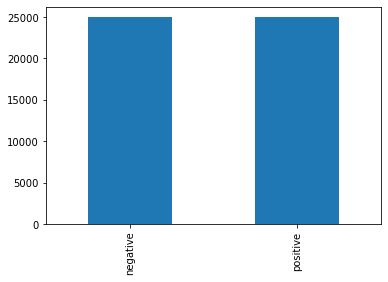

In [157]:
df['sentiment'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

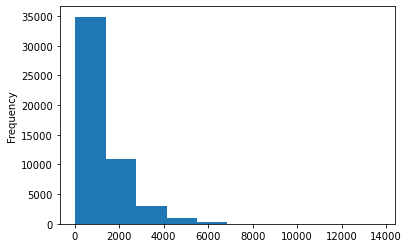

In [158]:
#Kontroller længden af positive kontra negative
#Normal distribution af fordelingen af længderne af reviews
df['review'].str.len().plot.hist()

## Data preprocessing

In [143]:
# Lowercase all reviews
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [144]:
# Remove html tags in review column with regex
df = df.replace(to_replace ='<[^>]*>', value = '', regex = True)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [145]:
# Remove stopwords
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [146]:
# Lemmatization
lemma = WordNetLemmatizer()
punctuations="?:!.,;`´"
def lemmatization(sentence):
    words = word_tokenize(sentence)
    for word in words:
        if word in punctuations:
            words.remove(word)
    res = map(lambda word: lemma.lemmatize(word, pos="v"), words)
    return " ".join(list(res))
    

df['review'] = df['review'].apply(lambda x: lemmatization(x))
df.head()

,review,sentiment
0,one reviewers mention watch 1 oz episode hook ...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically there 's family little boy ( jake ) ...,negative
4,petter mattei 's `` love time money '' visuall...,positive


In [ ]:
"""
# Stemming words in reviews
ps = PorterStemmer()

def stemming(sentence):
    words = word_tokenize(sentence)
    res = map(lambda x: ps.stem(x), words)
    return " ".join(list(res))
        
df['review'] = df['review'].head().apply(lambda x: stemming(x))
df.head()
"""

In [147]:
df.shape

(50000, 2)

In [148]:
X_train, X_test = df[:40000], df[40000:]
X_test

,review,sentiment
40000,first want say lean liberal political scale fi...,negative
40001,excite see sitcom would hopefully represent in...,negative
40002,look cover read stuff entirely different type ...,negative
40003,like many others count appearance dennis hoppe...,negative
40004,movie t.v day enjoy all first george jungle go...,negative
...,...,...
49995,think movie right good job creative original f...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic teach parochial elementary school nun...,negative
49998,i 'm go disagree previous comment side maltin ...,negative


In [149]:
# Convert seentiment to numeric. In this case, 0 for positive and 1 for negative
sentiment_label = df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [152]:
# Assign a number to each word and replace with that number in the sentence

# Get the actual texts from the data frame
review = df.review.values
# Initialize the tokenizer with a 5000 word limit. This is the number of words we would like to encode
tokenizer = Tokenizer(num_words=10000)
# Call fit_on_texts to create associations of words and numbers as shown in the image below.
tokenizer.fit_on_texts(review)

vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
# As the model input requires to have equal length, the sequence is padded to have a length
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [153]:
# Review and the corresponding numeric representation of it
print(review[0][:200])
print(padded_sequence[0])

one reviewers mention watch 1 oz episode hook right exactly happen me.the first thing strike oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pull punc
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    5 1877  373   15  245 2805  347
 1618  125  565  116  158   17   35   80 1054 2805 4725   68  522  104
  125  299   16 1375  158   23 5323 2109 9769   23  601 1682 1107  632
  322  522 3384  312   73  299   13  180 2805 6974   36 5972 2307  534
  580 1318  484 4124 1937 1108 6090 1821  868  229  237 4313 6299  484
  285   52 7032 4418 6714 2215  521  209  273   90 6403  393 7473   54
  156  177   10   19   28  217  812   23  633  123   16   23 1515  423
  112  287 1065 2282 1137  423  644  423  756 2805  729  114   35  347
   60  140 1054 1481 2038   28 1447   13   15  521  700 1001 2805    9
 8686  237  482 19

In [ ]:
# Build the model

embedding_vector_length = 32

model = Sequential()

model.add(Embedding(vocab_size, embedding_vector_length, input_length=len(padded_sequence[0])))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],
                  validation_split=0.2, epochs=5, batch_size=32)

In [ ]:
def analyze_sentence(sentence):
    tw = tokenizer.texts_to_sequences([sentence])
    tw = pad_sequences(tw, maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print(model.predict(tw))
    return sentiment_label[1][prediction]

In [ ]:
print(analyze_sentence("I saw this when it first came out and was shocked even then by the complete failure of the Hollywood hacks who made the film to either put Conan on the screen or even just make a decent movie. Phew. Recently, I tried to watch it again, twenty-odd years later - and I gagged. It's irredeemable. It's on a par with Plan 9. Only it's more boring."))

In [ ]:
model.save('./imdb_sentiment_analyzer')

In [ ]:
def analyze_sentence2(sentence:str, sentiment_score:int, serie):
    if sentiment_score == -1:
        sentiment_score = 0
    serie[0].append(sentiment_score)
    
    tw = tokenizer.texts_to_sequences([sentence])
    tw = pad_sequences(tw, maxlen=200)
    pred = model.predict(tw)
    prediction = int(pred.round().item())
    serie[1].append(pred[0])
    return sentiment_label[1][prediction]

series = [[],[]]
for text, sentiment in X_test.values[:100]:
    analyze_sentence2(text, sentiment, series)


In [ ]:
plt.figure(figsize=(20,8))

#Xt = model.predict(X_test)
#ax=[[series[0], series[1]]].plot()

plt.plot(series[0], label="Actual")
plt.plot(series[1], label="Predicted")
plt.legend()
plt.title("Test Dataset")